<P> <img src="https://i.ibb.co/gyNf19D/nhslogo.png" alt="nhslogo" border="0" width="100" align="right"><font size="6"><b> CS4132 Data Analytics</b> </font>

# Lab 8: Data Modelling

### Submission Instructions

* Complete the following questions and upload your `.ipynb` file to Coursemology.
* Name the file in the following format: `Lab<num><YourName>.ipynb`
* Before submitting, please ensure you click on "Kernel" > "Restart and Run All" on your jupyter notebook. 
* Finally, print a copy of your final solution to OneNote > Your Individual Student Notebook > Labs. Name the page `Lab <num>`.

## Q1

We will use the used car dataset from the notes for this question.

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
import seaborn as sns
df = pd.read_csv("Lab8Q1.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


#### a) Draw a scatterplot to investigate the relationship between `highway-mpg` and the `price` of cars.

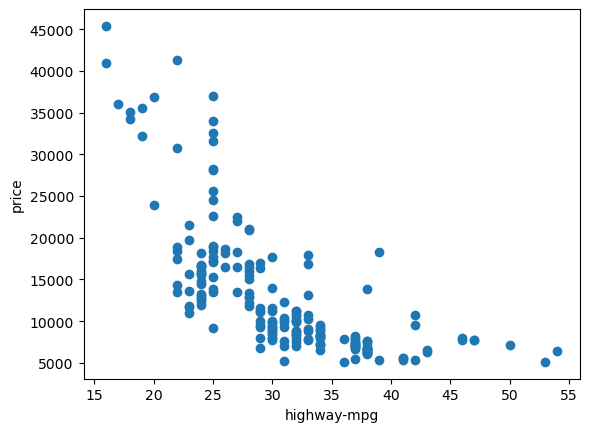

In [111]:
#your solution
plt.scatter(df['highway-mpg'], df.price)
plt.xlabel('highway-mpg')
plt.ylabel('price')
plt.show()

#### b) Develop a SLRM for the data in (a) using `scikitlearn`. Ensure you split the dataset into training and test data.

In [112]:
#your solution
lm = LinearRegression()
df2 = df[(~df.price.isna()) & (~df['highway-mpg'].isna())]
X_train, X_test, y_train, y_test = train_test_split(df2[['highway-mpg']], df2['price'], test_size=0.2, random_state=0)
lm.fit(X_train, y_train)

LinearRegression()

Hence, print the equation of your model.

In [113]:
#your solution
print("Equation is " + str(lm.coef_[0].round(5)) + "x + " + str(lm.intercept_.round(3)))

Equation is -802.54205x + 37696.717


#### c) Now, make predictions using your test data. Display the predicted results.

In [114]:
#your solution
yhat = lm.predict(X_test)
yhat

array([ 3187.40889536, 11212.82939403, 17633.16579297, 20040.79194257,
       18435.70784284, 10410.28734417, 17633.16579297,  6397.57709483,
       15225.53964337,  8002.66119456, 12015.3714439 , 17633.16579297,
         779.78274576,  8805.20324443, 18435.70784284, 17633.16579297,
       10410.28734417, 15225.53964337, 11212.82939403,  7200.1191447 ,
        3989.95094523, 19238.2498927 , 22448.41809217, 10410.28734417,
        3989.95094523, 17633.16579297, 10410.28734417, 14422.9975935 ,
       16028.08169324, 22448.41809217, 21645.87604231, 19238.2498927 ,
       12015.3714439 , 17633.16579297, 13620.45554363, 12817.91349377,
       15225.53964337, 20040.79194257, 12015.3714439 , 18435.70784284,
        8805.20324443])

#### d) Evaluate your model by plotting a scatter plot of Actual vs Predicted.

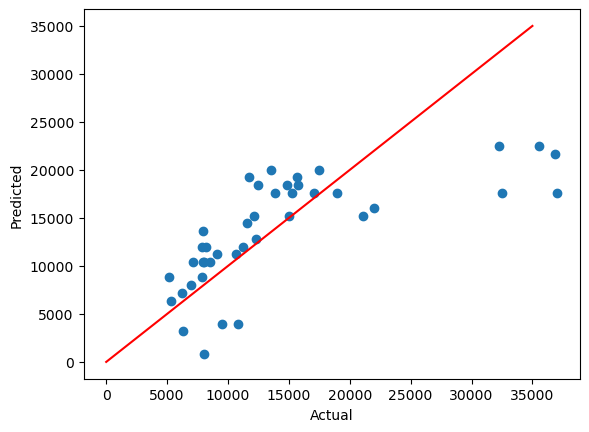

In [115]:
#your solution
plt.scatter(y_test, yhat)
plt.plot([0, 35000], [0, 35000], color="red")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

State your observations.

<div class="alert alert-block alert-info">

The points get further away from the line as the value increases. This means that the higher the value, the less accurate the predictions.
    
</div>

#### e) Evaluate your model by plotting a residual plot.

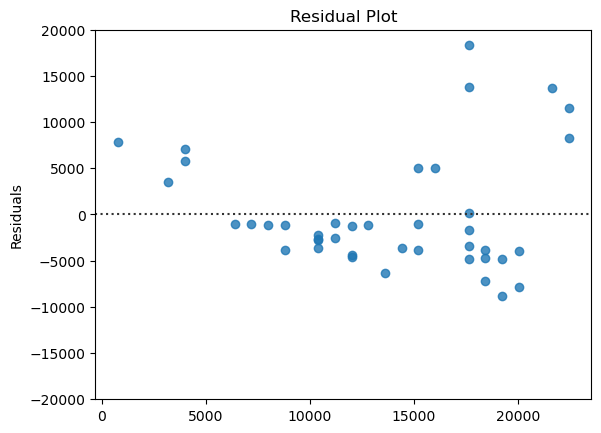

In [139]:
#your solution
residual = (y_test - yhat).to_frame()
sns.residplot(x = yhat, y = residual)
plt.xlabel('')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.ylim((-20000, 20000))
plt.show()

State your observations/conclusion.

<div class="alert alert-block alert-info">

A linear regression model is not suitable since the points are not randomly and evenly spread, instead crowding around 0 and the positive extremities.
    
</div>

## Q2

We will use the data Lab8Q2.csv for this question. This dataset contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. 
-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE** e.g. 4.7
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


In [155]:
df = pd.read_csv("Lab8Q2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#### a) Perform relevant EDA for the following features: `'ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS'`

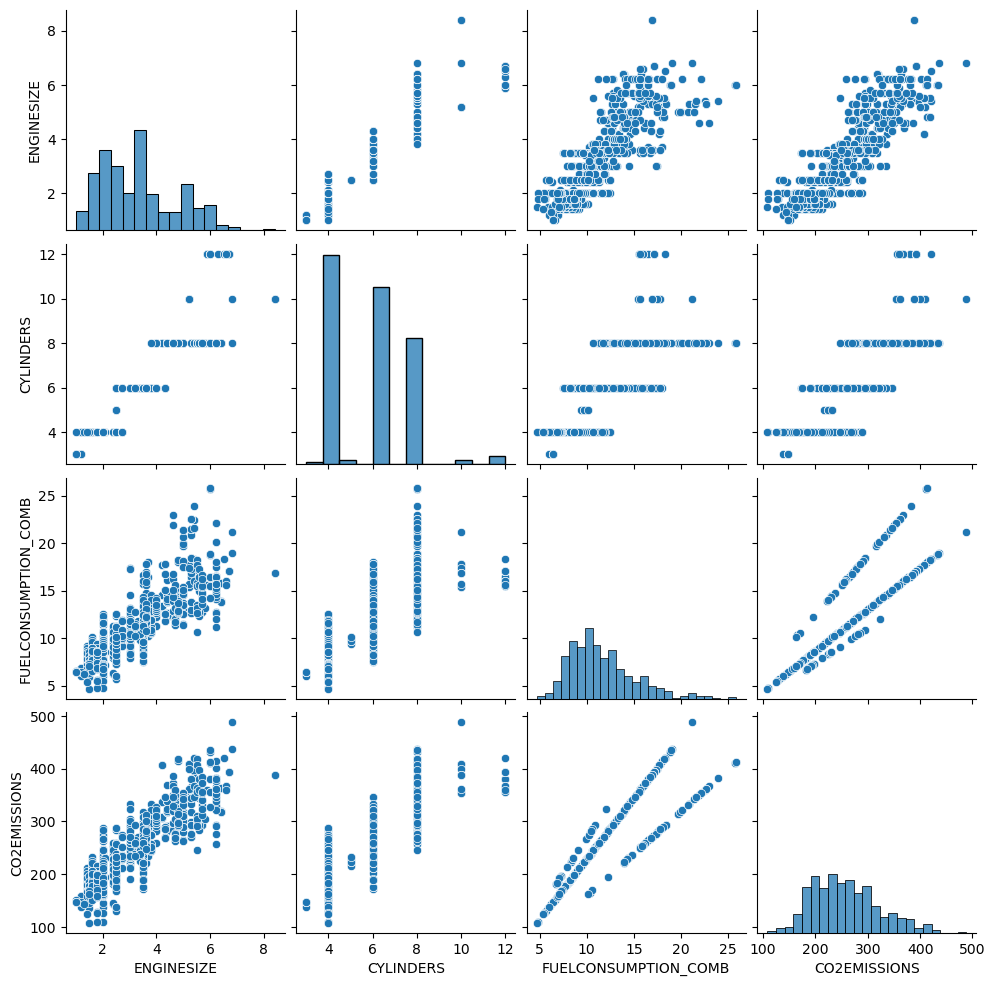

In [156]:
#your solution
df.dropna(subset=["ENGINESIZE"], axis=0, inplace= True)
dfsub = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
sns.pairplot(dfsub)
plt.show()

#### b) Based on the observations from (a), select ONE suitable feature and develop a SLRM to predict the CO2 emissions. Ensure you split the dataset into training and test data.

In [157]:
#your solution
lm = LinearRegression()
df2 = df[(~df.ENGINESIZE.isna()) & (~df.CO2EMISSIONS.isna())]
X_train, X_test, y_train, y_test = train_test_split(df2[['ENGINESIZE']], df2['CO2EMISSIONS'], test_size=0.2, random_state=0)
lm.fit(X_train, y_train)

LinearRegression()

Hence, print the equation of your model.

In [158]:
#your solution
print("Equation is " + str(lm.coef_[0].round(5)) + "x + " + str(lm.intercept_.round(3)))

Equation is 39.24838x + 126.189


#### c) Now, make predictions using your test data. Display the predicted results.

In [159]:
#your solution
yhat = lm.predict(X_test)
yhat

array([342.05531526, 220.3853239 , 220.3853239 , 232.15983919,
       224.31016233, 298.88209252, 220.3853239 , 267.48338507,
       220.3853239 , 322.43112311, 267.48338507, 393.07821487,
       243.93435448, 298.88209252, 181.13693958, 283.1827388 ,
       314.58144625, 188.98661645, 263.55854664, 385.22853801,
       196.83629331, 263.55854664, 263.55854664, 204.68597017,
       224.31016233, 243.93435448, 275.33306193, 334.2056384 ,
       342.05531526, 204.68597017, 345.9801537 , 224.31016233,
       263.55854664, 243.93435448, 196.83629331, 188.98661645,
       349.90499213, 220.3853239 , 232.15983919, 267.48338507,
       196.83629331, 196.83629331, 220.3853239 , 204.68597017,
       342.05531526, 204.68597017, 220.3853239 , 188.98661645,
       334.2056384 , 357.75466899, 310.65660781, 271.4082235 ,
       267.48338507, 196.83629331, 220.3853239 , 188.98661645,
       306.73176938, 196.83629331, 251.78403135, 204.68597017,
       188.98661645, 224.31016233, 204.68597017, 334.20

#### d) Evaluate your model by plotting a residual plot.

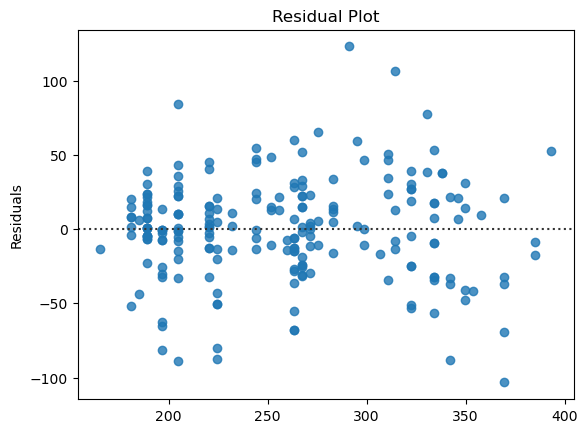

In [160]:
#your solution
residual = (y_test - yhat).to_frame()
sns.residplot(x = yhat, y = residual)
plt.xlabel('')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

State your observations/conclusion.

<div class="alert alert-block alert-info">

The points are randomly and evenly scattered about the line y = 0. This means the linear regression model is appropriate to use in this case and the relationship between enginesize and co2emissions is linear.
    
</div>

#### e) Calculate the MSE.

In [161]:
#your solution
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, yhat)

1181.528809303555

#### f) Evaluate your model by plotting a scatter plot of Actual vs Predicted.

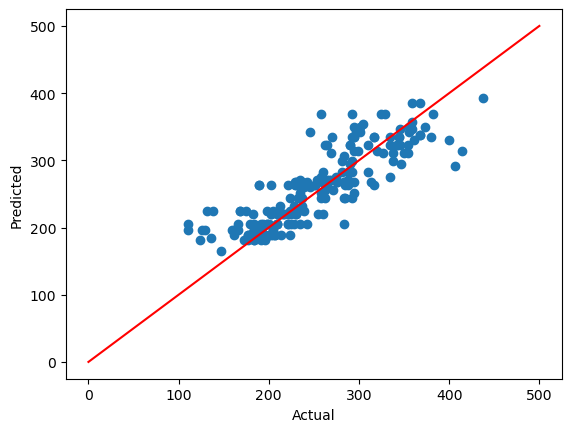

In [162]:
#your solution
plt.scatter(y_test, yhat)
plt.plot([0, 500], [0, 500], color="red")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

What insights can you draw from the scatterplot?

<div class="alert alert-block alert-info">

All points are relatively close and clustered around the line y = x. This means that the linear regression model is a good prediction of the actual values.
    
</div>

## Q3

In reality, there are multiple variables that predict the Co2emission. When more than one independent variable is present, the process is called multiple linear regression. For example, predicting co2emission using FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. The good thing here is that Multiple linear regression is the extension of simple linear regression model.

#### a) Develop a MLRM using the 3 attributes stated above. 

In [173]:
#your solution
df3 = df.dropna(subset=['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS'], axis = 0) 
features = df3[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
mlm = LinearRegression()
X_train2, X_test2, y_train2, y_test2 = train_test_split(features, df['CO2EMISSIONS'], test_size = 0.2, random_state = 0)
mlm.fit(X_train2, y_train2)

LinearRegression()

Print the equation for the MLRM.

In [178]:
#your solution
'Equation is ' + str(mlm.coef_[0].round(3)) + ' * ENGINESIZE + ' + str(mlm.coef_[1].round(3)) + ' * CYLINDERS + ' + str(mlm.coef_[2].round(3)) + ' * FUELCONSUMPTION_COMB + ' + str(mlm.intercept_.round(5))

'Equation is 11.99 * ENGINESIZE + 7.545 * CYLINDERS + 8.987 * FUELCONSUMPTION_COMB + 69.05221'

#### b) Now, make predictions using your test data. Display the predicted results.

In [179]:
#your solution
yhat2 = mlm.predict(X_test2)
yhat2

array([334.65227307, 209.78816154, 217.87642537, 229.37322867,
       194.81062694, 296.29986196, 210.68685752, 265.32765366,
       207.09207359, 319.67034797, 279.70678935, 381.69354216,
       224.88194401, 291.80638206, 185.21648722, 278.922146  ,
       348.72672119, 205.58839296, 254.24300481, 378.91867664,
       195.40463534, 229.97821332, 251.54691687, 217.57393304,
       180.43149124, 260.82978325, 266.82694379, 358.3164704 ,
       291.51486598, 166.34826212, 336.74996211, 222.67020235,
       284.79866816, 242.85586363, 195.40463534, 194.80404119,
       312.7854677 , 214.28164144, 224.16949248, 250.04982198,
       192.7085474 , 192.7085474 , 207.09207359, 187.91696567,
       311.28617756, 200.4987094 , 229.55947312, 188.51316932,
       386.17604581, 370.52572523, 317.87076076, 320.44840557,
       270.71982954, 171.13984386, 217.87642537, 188.51316932,
       295.10306416, 182.82289161, 253.34211358, 204.99218931,
       199.29752109, 209.18976263, 211.28306117, 358.31

#### c) Calculate the MSE.

In [180]:
#your solution
mean_squared_error(y_test2, yhat2)

589.2351940837909

#### d) Calculate R-squared

In [182]:
#your solution 
mlm.score(X_train2, y_train2)

0.8639958377437472

What can you conclude based on the R-squared value?

<div class="alert alert-block alert-info">

86.4% of variance of co2emissions can be attributed to the 3 factors.
    
</div>

#### e) Evaluate the model by plotting a scatterplot of Actual vs Predicted.

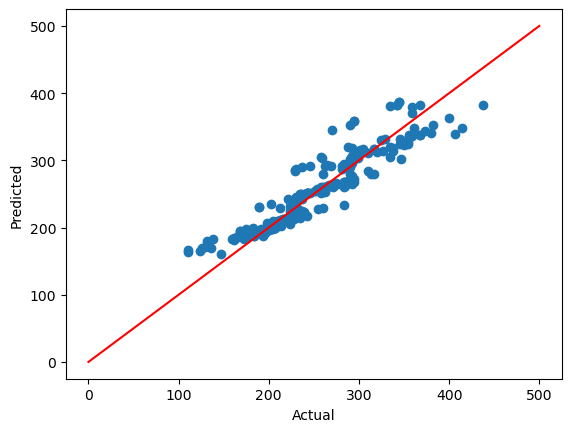

In [185]:
#your solution
plt.scatter(y_test2, yhat2)
plt.plot([0, 500], [0, 500], color="red")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

What insights can you draw from the scatterplot?

<div class="alert alert-block alert-info">

All points are relatively close and clustered around the line y = x. This means that the linear regression model is a good prediction of the actual values.
    
</div>

#### f) Draw a residual plot for each independent variable.

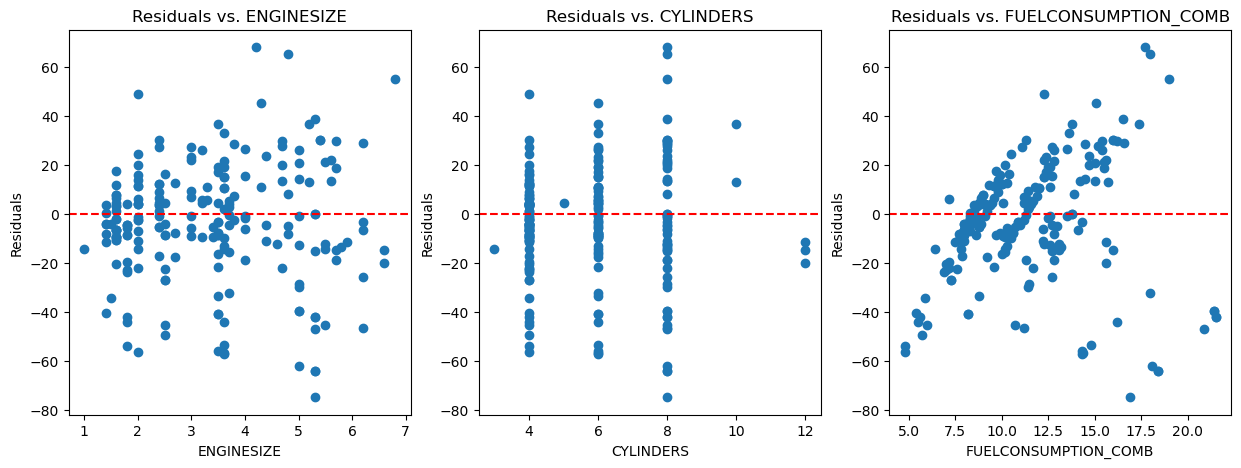

In [187]:
#your solution
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
residuals = y_test2 - yhat2
for i, ax in enumerate(axs):
    ax.scatter(X_test2.iloc[:, i], residuals)
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_xlabel(X_test2.columns[i])
    ax.set_ylabel('Residuals')
    ax.set_title(f'Residuals vs. {X_test2.columns[i]}')
 
plt.show()

What insights and conclusion can you draw from the residual plots?

<div class="alert alert-block alert-info">

ENGINESIZE: The points are randomly and evenly scattered about y = 0. This means there is a linear relationship between engine size and co2 emissions.

CYLINDERS: The points are randomly and evenly scattered about y = 0. This means there is a linear relationship between cylinders and co2 emissions.

FUELCONSUMPTION_COMB: The points are in a fan shape. This means there is no linear relationship between fuel consumption and co2 emissions.
    
</div>